**시계열 자료.**

<br>

## Todo List (큰 주제로 보면)

<br>

- 연도별 추세 확인? 시각화로. --> X001-2 에서 진행해봄.
- 연도별 자살률 확인?
    - 이 자살률을 국가/나이/세대/성별 로 구분해서 시각화.
        - **연도별 국가** 확인
        - **나이, 세대** 확인
        - **성별** 확인중

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [2]:
# data loading
# df = pd.read_csv('C:\\Users\\user\\Desktop\\todoData\\fixed_suicide_3.csv')
df = pd.read_csv('C:\\Users\\skdbs\\Desktop\\todoData\\fixed_suicide_3.csv')

In [3]:
df.head()

,Unnamed: 0,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI_for_year,gdp_for_year_($),gdp_per_capita_($),generation
0,0,Germany,1990,male,75+ years,1516,1717700,88.26,Germany1990,0.801,"1,764,967,948,917",23546,G.I. Generation
1,1,Germany,1990,male,55-74 years,2406,6593100,36.49,Germany1990,0.801,"1,764,967,948,917",23546,G.I. Generation
2,2,Germany,1990,male,35-54 years,3302,11127100,29.68,Germany1990,0.801,"1,764,967,948,917",23546,Silent
3,3,Germany,1990,female,75+ years,1174,3978800,29.51,Germany1990,0.801,"1,764,967,948,917",23546,G.I. Generation
4,4,Germany,1990,male,25-34 years,1488,6721200,22.14,Germany1990,0.801,"1,764,967,948,917",23546,Boomers


In [4]:
# 불필요한 컬럼 삭제
dropList = ['Unnamed: 0', 'country-year']
df = df.drop(columns=dropList)

In [5]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'HDI_for_year', 'gdp_for_year_($)',
       'gdp_per_capita_($)', 'generation'],
      dtype='object')

In [6]:
# index 재설정 은 하면 안될거같다.
# df.set_index('year', inplace=True)

In [7]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI_for_year,gdp_for_year_($),gdp_per_capita_($),generation
0,Germany,1990,male,75+ years,1516,1717700,88.26,0.801,"1,764,967,948,917",23546,G.I. Generation
1,Germany,1990,male,55-74 years,2406,6593100,36.49,0.801,"1,764,967,948,917",23546,G.I. Generation
2,Germany,1990,male,35-54 years,3302,11127100,29.68,0.801,"1,764,967,948,917",23546,Silent
3,Germany,1990,female,75+ years,1174,3978800,29.51,0.801,"1,764,967,948,917",23546,G.I. Generation
4,Germany,1990,male,25-34 years,1488,6721200,22.14,0.801,"1,764,967,948,917",23546,Boomers


In [8]:
# 나라별로 split
GerDF = df[df['country'] == 'Germany']
JapDF = df[df['country'] == 'Japan']
KorDF = df[df['country'] == 'Republic of Korea']

In [9]:
GerDF.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI_for_year,gdp_for_year_($),gdp_per_capita_($),generation
0,Germany,1990,male,75+ years,1516,1717700,88.26,0.801,"1,764,967,948,917",23546,G.I. Generation
1,Germany,1990,male,55-74 years,2406,6593100,36.49,0.801,"1,764,967,948,917",23546,G.I. Generation
2,Germany,1990,male,35-54 years,3302,11127100,29.68,0.801,"1,764,967,948,917",23546,Silent
3,Germany,1990,female,75+ years,1174,3978800,29.51,0.801,"1,764,967,948,917",23546,G.I. Generation
4,Germany,1990,male,25-34 years,1488,6721200,22.14,0.801,"1,764,967,948,917",23546,Boomers


split을 괜히했나 싶기도 하고

In [10]:
corrList = ['suicides_no', 'population', 'suicides/100k pop', 'HDI_for_year', 'gdp_per_capita_($)']
df[corrList].corr()

,suicides_no,population,suicides/100k pop,HDI_for_year,gdp_per_capita_($)
suicides_no,1.000000,0.696447,0.387184,0.151740,0.268703
population,0.696447,1.000000,-0.111540,0.200411,0.430052
suicides/100k pop,0.387184,-0.111540,1.000000,0.072377,-0.035444
HDI_for_year,0.151740,0.200411,0.072377,1.000000,0.798088
gdp_per_capita_($),0.268703,0.430052,-0.035444,0.798088,1.000000


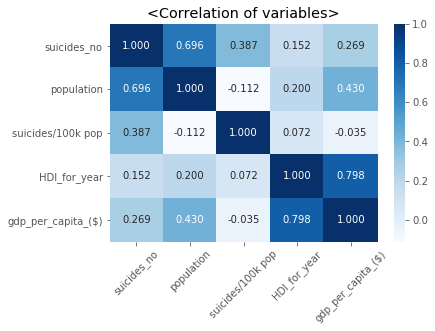

In [11]:
fig = sns.heatmap(data = df[corrList].corr(), annot = True, fmt='.3f', cmap='Blues')
fig.set_xticklabels(fig.get_xticklabels(), rotation=45)
plt.title('<Correlation of variables>')
plt.show()

***연도별 자살률 확인해야한다***

In [12]:
KorDF['year']

684     1985
685     1985
686     1985
687     1985
688     1985
        ... 
1051    2015
1052    2015
1053    2015
1054    2015
1055    2015
Name: year, Length: 372, dtype: int64

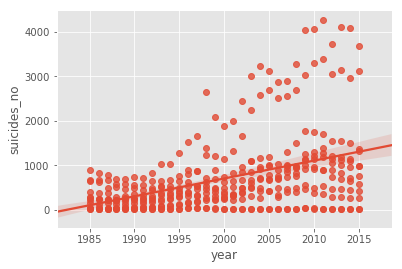

In [13]:
sns.regplot(x=KorDF['year'], y=KorDF['suicides_no'], fit_reg=True)

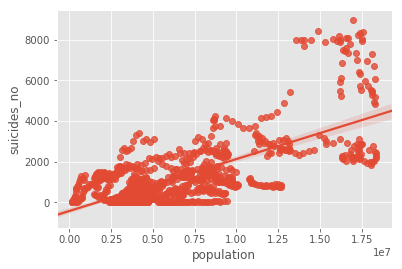

In [14]:
sns.regplot(x=df['population'], y=df['suicides_no'], fit_reg=True)

In [15]:
df['year'].describe # int형이네

<bound method NDFrame.describe of 0       1990
1       1990
2       1990
3       1990
4       1990
        ... 
1051    2015
1052    2015
1053    2015
1054    2015
1055    2015
Name: year, Length: 1056, dtype: int64>

In [16]:
df['year'] = df['year'].astype('string')

In [17]:
df['year'].describe()

count     1056
unique      31
top       2012
freq        36
Name: year, dtype: object

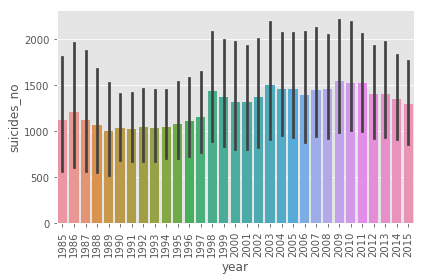

In [18]:
sns.barplot(x=df['year'], y=df['suicides_no'])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

***1998~2011년 까지가 높음. 증가하는 추세?***

<br>

***2011년 이후론 감소하는 추세***

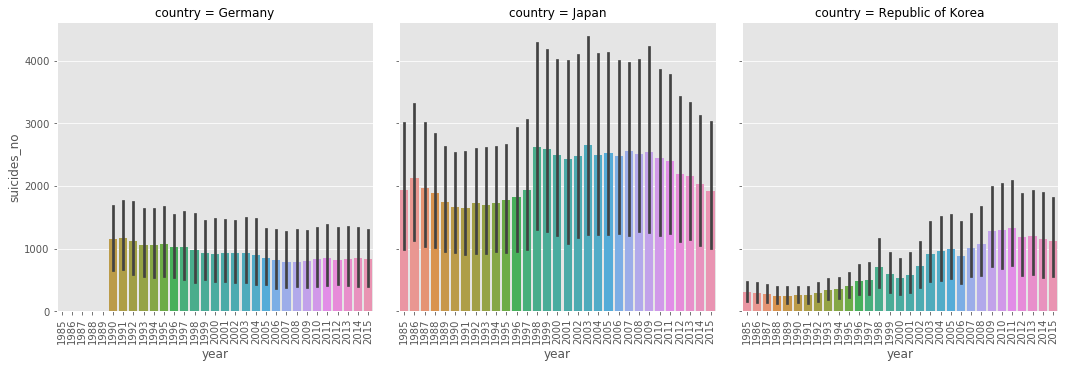

In [19]:
# 나라별로 찢어보자.
# 1행3열.
# sns.catplot 써서 찢어서 내놓을 수 있다고 한다.
allCountry = sns.catplot(kind='bar', data=df, x='year', y='suicides_no', 
                         col='country', col_wrap=3)
allCountry.set_xticklabels(rotation=90) # 모든 그래프 xlabel 회전
# plt.xticks(rotation=90) # 이거로 하면 마지막 xlabel만 회전한다.
plt.show()

- 독일은 꾸준히 감소하는 추세. 
- 일본은 1997년 $\rightarrow$ 1998년 동안 갑작스레 자살률이 많이 증가했음.
    - 2009년까지 비슷한 수준으로 유지되고 있음.
    - 2010년부턴 자살률이 조금씩 줄어드는 것으로 보임.
- 한국도 일본과 마찬가지로 1997년 $\rightarrow$ 1998년에 자살률이 큰폭으로 증가했음.
    - 2011년까지 꾸준히 증가하는 추세.
    - 2012년에 감소, 약간 감소하는 추세를 보임.

 
**일본, 한국은 왜 1998년에 자살률이 갑자기 증가했을까?**

<br>

- **IMF 외환위기**. 1997년 12월에 발발.  

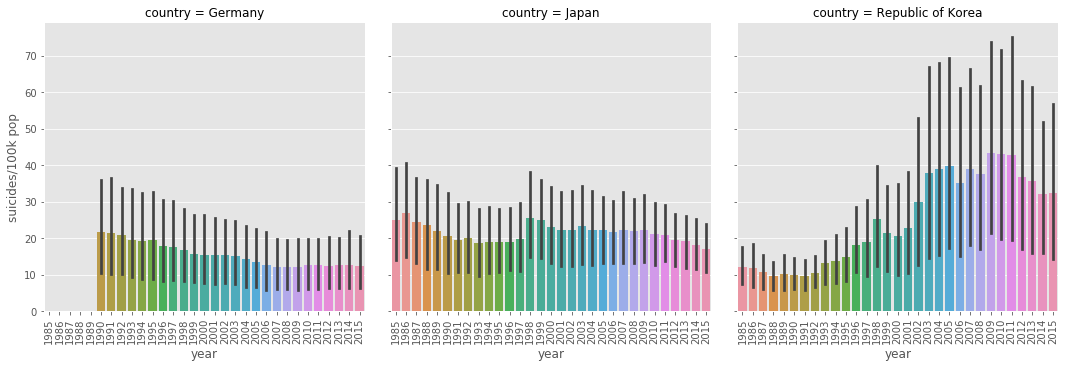

In [20]:
# suicides/100k pop은 어떻게 나오는지 한번 봐보자.
# suicides_no는 크기가 천차만별이라 범위가 좀 뒤죽박죽.
allCountry_ratio = sns.catplot(kind='bar', data=df, x='year', y='suicides/100k pop',
                               col='country', col_wrap=3)
allCountry_ratio.set_xticklabels(rotation=90)
plt.show()

### 인구수 대비로 보면 한국이 제일 많다.
### 증가폭도 제일 크다.

<br>

**그래도 독일은 꾸준히 감소중이다.**
**일본도 1997년 IMF 이후에 살짝 올라갔다가 그뒤론 감소중.**

<br>

***그저..대한민국..***

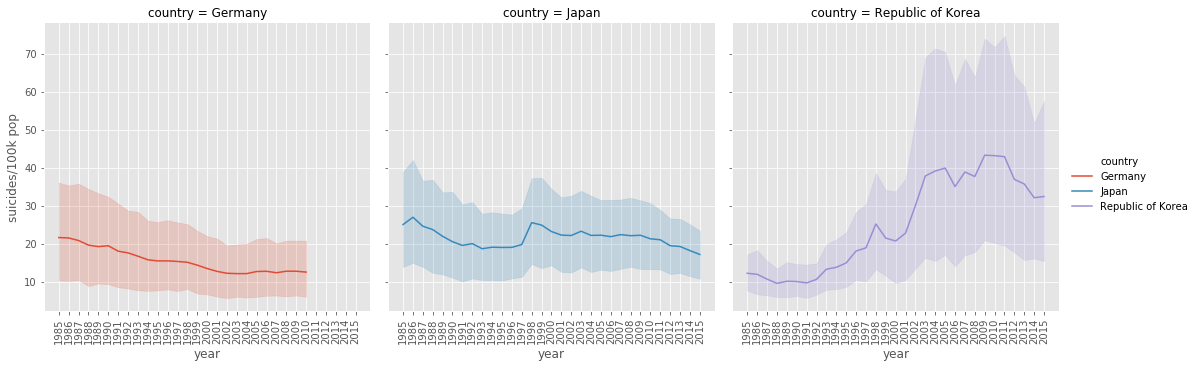

In [21]:
# Lineplot으로 봐보자.
allCountry_ratio_line = sns.relplot(kind='line', data=df, x='year', y='suicides/100k pop', 
                                   hue='country', col='country', col_wrap=3)
allCountry_ratio_line.set_xticklabels(rotation=90)
plt.show()

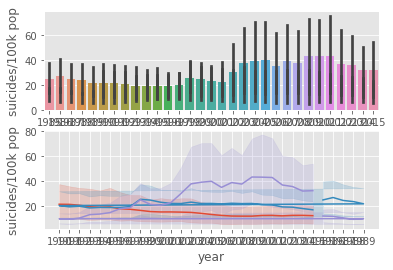

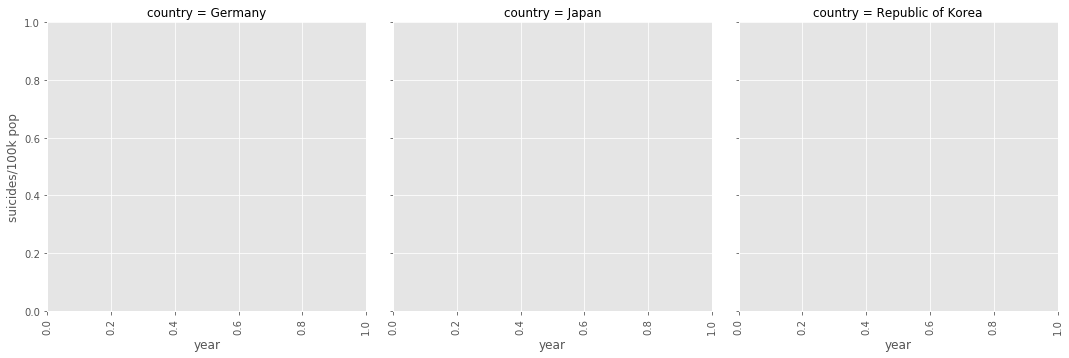

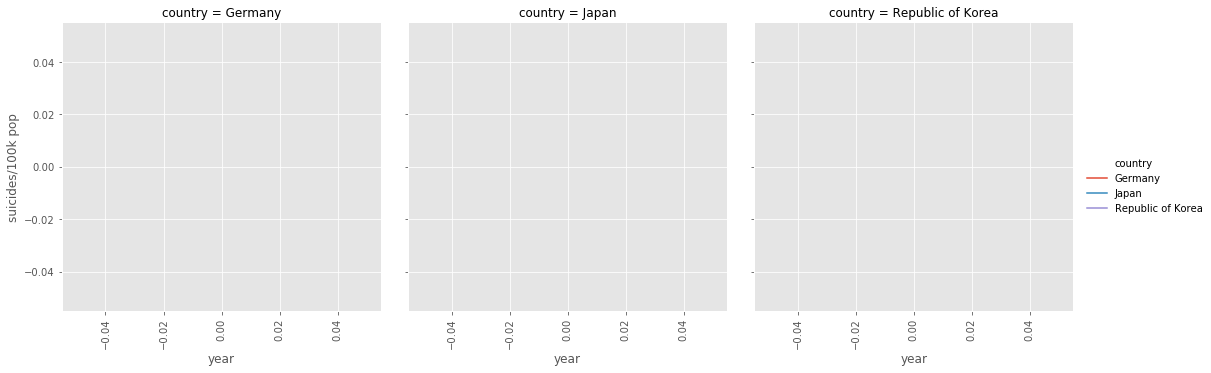

In [22]:
# 두개를 한번에 그려보도록 해볼까?
"""
fig = plt.figure()
ax1 = fig.add_subplot(211) # 2행 1열 크기 도화지, 1행 위치
ax2 = fig.add_subplot(212)
"""

fig, ax = plt.subplots(nrows=2)
allCountry_ratio = sns.catplot(kind='bar', data=df, x='year', y='suicides/100k pop',
                               col='country', col_wrap=3, ax=ax[0])
allCountry_ratio.set_xticklabels(rotation=90)
allCountry_ratio_line = sns.relplot(kind='line', data=df, x='year', y='suicides/100k pop', 
                                   hue='country', col='country', col_wrap=3, ax=ax[1])
allCountry_ratio_line.set_xticklabels(rotation=90)

"""
fig, axes = plt.subplots(2,1, figsize=(5,10))
allCountry_ratio = sns.catplot(kind='bar', data=df, x='year', y='suicides/100k pop',
                               col='country', col_wrap=3, ax=axes[0])
allCountry_ratio.set_xticklabels(rotation=90)
allCountry_ratio_line = sns.relplot(kind='line', data=df, x='year', y='suicides/100k pop', 
                                   hue='country', col='country', col_wrap=3, ax=axes[1])
allCountry_ratio_line.set_xticklabels(rotation=90)
"""
plt.show()

## https://github.com/mwaskom/seaborn/issues/1514
## 둘이 한번에 같이 못쓴다고 한다. 에러낸다고...

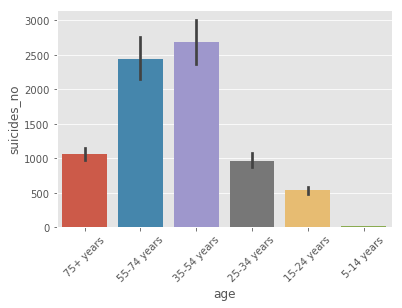

In [23]:
sns.barplot(x=df['age'], y=df['suicides_no'])
plt.xticks(rotation=45)
plt.show()

***35-54, 55-74세 자살수가 많음.***

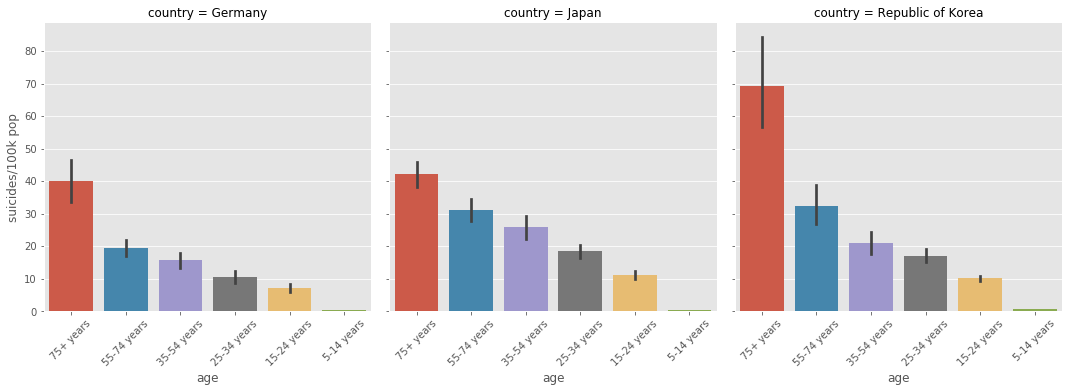

In [24]:
# 나이도 국가별로 찢어서 봐보자.
allCountry2 = sns.catplot(kind='bar', data=df, x='age', y='suicides/100k pop', 
                          col='country', col_wrap=3)
allCountry2.set_xticklabels(rotation=45)
plt.show()

***왜 75세 이상이 가장 높게나오는걸까***  <br>
***예전에 봤을땐 35-54랑 55-74 였는데 흠***

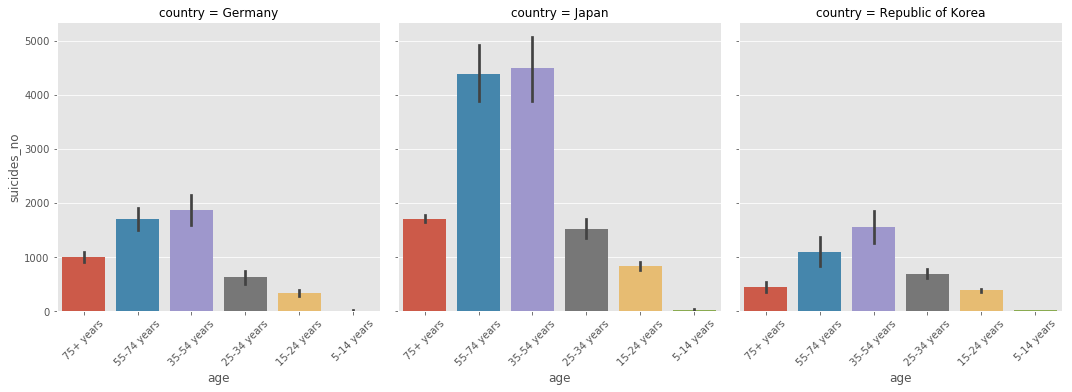

In [25]:
allCountry2_no = sns.catplot(kind='bar', data=df, x='age', y='suicides_no', 
                          col='country', col_wrap=3)
allCountry2_no.set_xticklabels(rotation=45)
plt.show()

***인구수대비로 봤을때 75세 이상이 많아서 그런거인듯***

75+ years      176
15-24 years    176
5-14 years     176
25-34 years    176
35-54 years    176
55-74 years    176
Name: age, dtype: int64


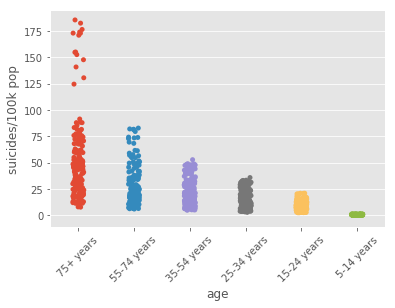

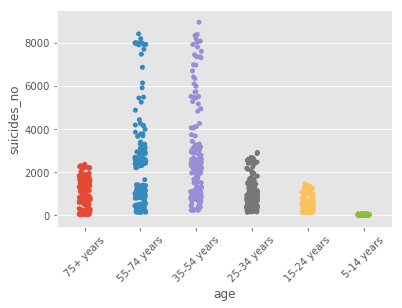

In [26]:
print(df['age'].value_counts())
strip1 = sns.stripplot(x='age', y='suicides/100k pop', data=df)
strip1.set_xticklabels(strip1.get_xticklabels(), rotation=45)
plt.show()
strip2 = sns.stripplot(x='age', y='suicides_no', data=df)
strip2.set_xticklabels(strip2.get_xticklabels(), rotation=45)
plt.show()

***이걸 어떻게 봐야하지 흠...***

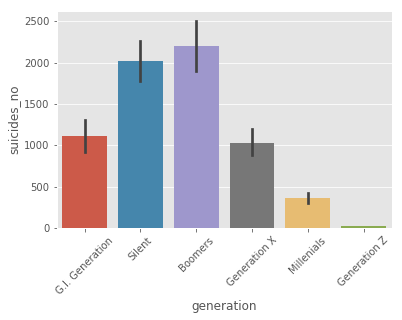

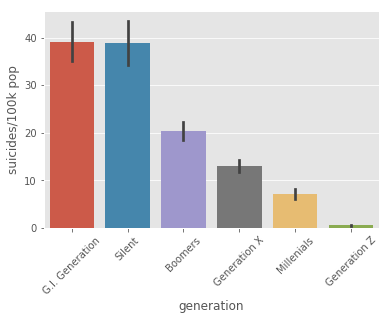

In [27]:
# 일단 세대별로 한번 봐보자.
sns.barplot(x=df['generation'], y=df['suicides_no'])
plt.xticks(rotation=45)
plt.show()

sns.barplot(x=df['generation'], y=df['suicides/100k pop'])
plt.xticks(rotation=45)
plt.show()

- **G.I. Generation (가장 위대한 세대)** : 1901~1927 출생
- **Silent (침묵의 세대)** : 1928 ~ 1945 출생
- **Boomers (베이비 붐 세대)** : 1960s 출생
- **Generation X (X 세대)** : 1970s 출생
- **Millenials (밀레니얼 세대)** : 1981 ~ 1996 출생
- **Generation Z (Z 세대)** : 1997 ~ 2012년 출생

단순 자살률로만 보면 Silent 세대, Boomers 가 많음. 35-54, 55-74세 들. 중장년층 <br>
근데 마찬가지로 인구수 대비 자살률로 보면 G.I., Silent가 많음. 55-74, 75+세 들. 장년층? 

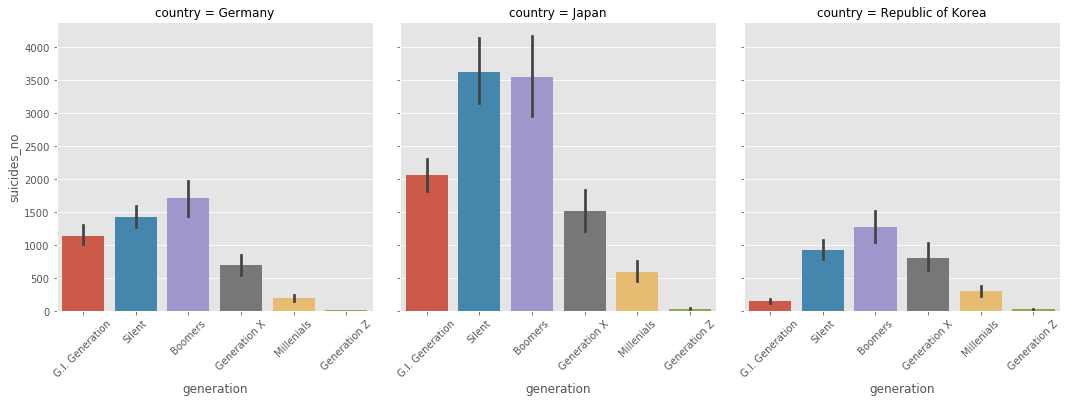

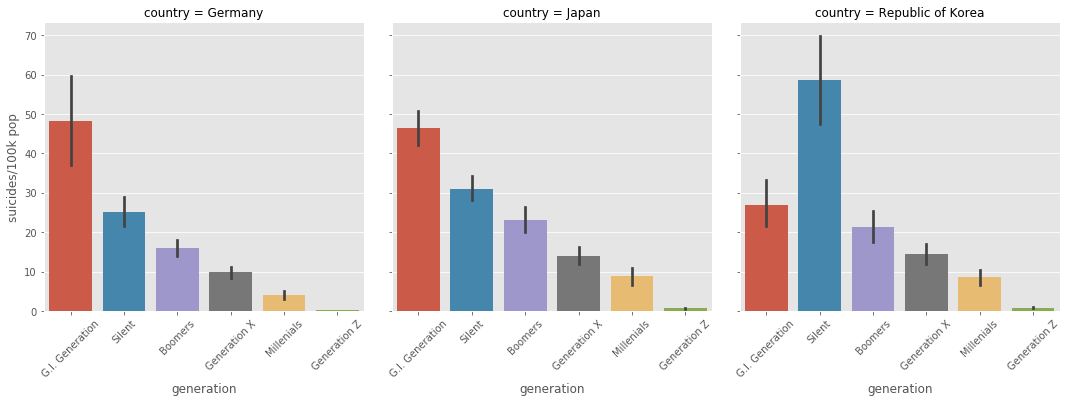

In [28]:
# 국가별로 같이 또 찢어보자.
allCountry3 = sns.catplot(kind='bar', data=df, x='generation', y='suicides_no', 
                          col='country', col_wrap=3)
allCountry3.set_xticklabels(rotation=45)
plt.show()

allCountry3_no = sns.catplot(kind='bar', data=df, x='generation', y='suicides/100k pop',
                            col = 'country', col_wrap=3)
allCountry3_no.set_xticklabels(rotation=45)
plt.show()

***인구수대비 자살률로 보면 유난히 한국 Silent세대 가 가장 많다. 1928~1945 출생.***  <br>
***IMF 때 이 사람들은 50대 ~ 70대 정도?***

--------------------

***일본의 Silent, Boomers 자살수는 압도적으로 많은데, 인구수 대비 자살률로 보면 그리 안높음. 뭐지?***  <br>
***저 세대의 인구수가 하도 많아서 실제 자살한 사람이 많지만, 인구수 대비로 보면 그리 안 많아보이는 걸까?***

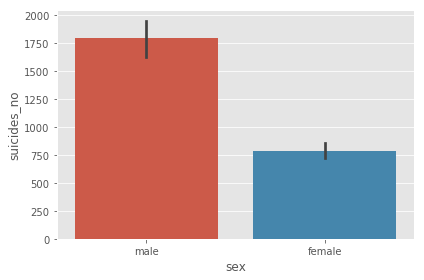

In [29]:
sns.barplot(x=df['sex'], y=df['suicides_no'])
plt.tight_layout()
plt.show()

suicides_no에 큰 영향을 미치는건 population. 인구수.

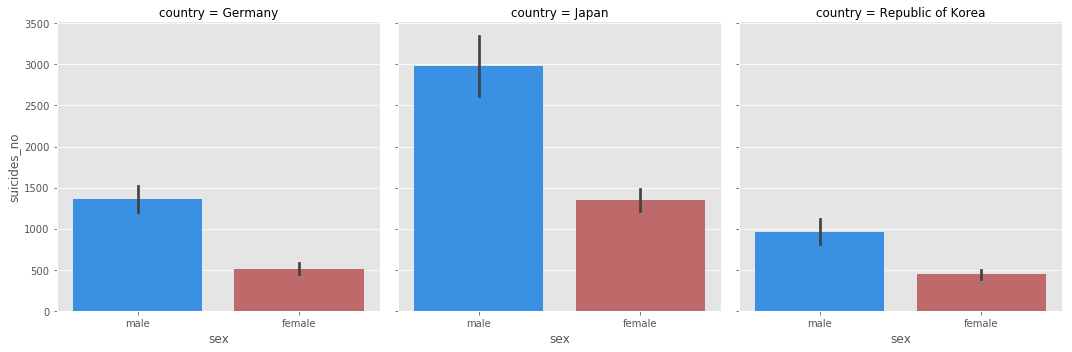

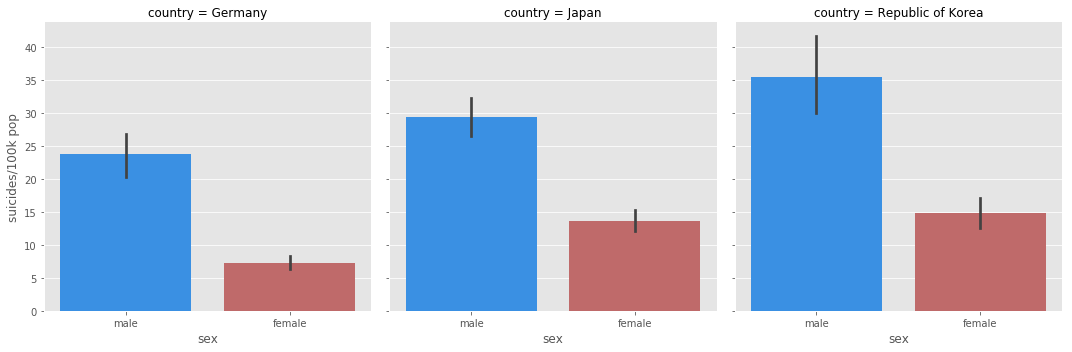

In [30]:
# 얘도 나라별로 한번 봐보자.
# 색 구분은 색상코드표에서 뜯어와서 적당히 넣자 그냥.
colorList = ['#1E90FF', '#CD5C5C']
#sns.catplot(kind='bar', data=df, x='sex', y='suicides_no', col='country',
#            palette=sns.color_palette(colorList), hue='sex') # hue 차이가 뭐지?
sns.catplot(kind='bar', data=df, x='sex', y='suicides_no', col='country',
            palette=sns.color_palette(colorList))
plt.show()

sns.catplot(kind='bar', data=df, x='sex', y='suicides/100k pop', col='country',
            palette=sns.color_palette(colorList))
plt.show()

***인구수 대비던, 전체 자살수 이던 남성 자살수가 여성보다 많음.***  <br>
***요인은 이거저거 많겠지? 당장 여기서 유추해보기엔 좀 무리가 있을 것 같고...***

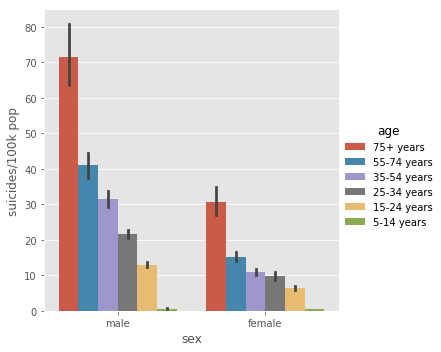

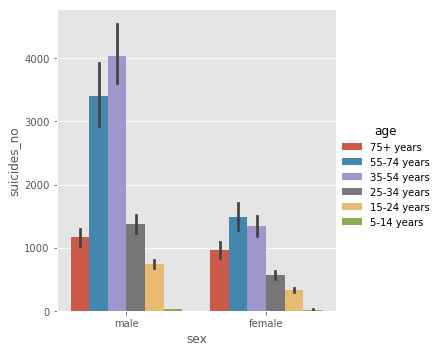

In [31]:
# 남/여를 세대별or연령대 별로 찢어볼 수가 있을까
# 된다.
# sns.catplot(kind='bar', data=KorDF, x='sex', y='suicides/100k pop', col='age', col_wrap=2)
sns.catplot(kind='bar', data=df, x='sex', y='suicides/100k pop', hue='age', legend=True)
plt.show()

sns.catplot(kind='bar', data=df, x='sex', y='suicides_no', hue='age', legend=True)
plt.show()

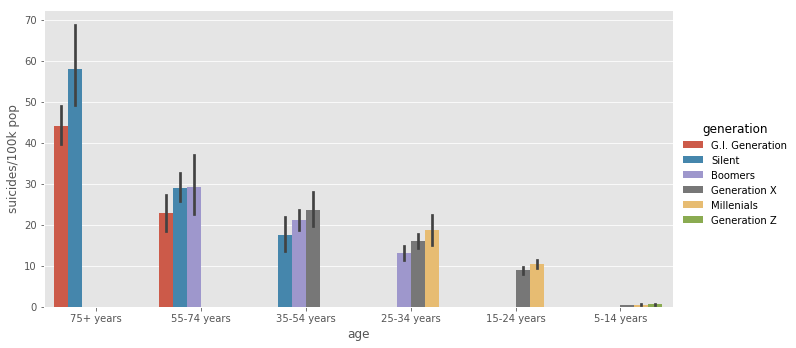

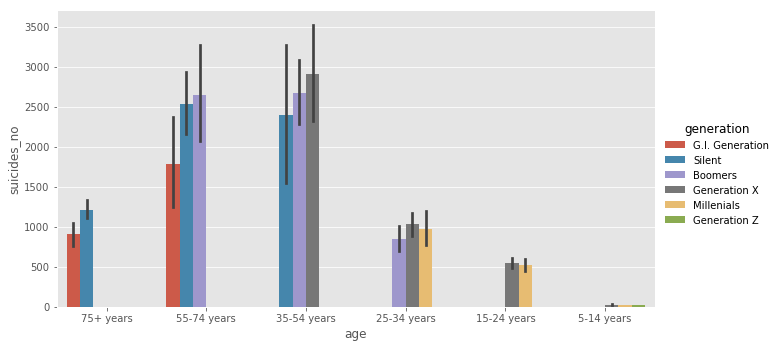

In [32]:
# 그럼 연령대별로 세대로 찢어서 그릴수도 있지 않을까
g = sns.catplot(kind='bar', data=df, x='age', y='suicides/100k pop', hue='generation', 
                legend=True)
g.fig.set_size_inches(12,6)
g.fig.subplots_adjust(top=0.81, right=0.86)
plt.show()

g2 = sns.catplot(kind='bar', data=df, x='age', y='suicides_no', hue='generation', 
                legend=True)
g2.fig.set_size_inches(12,6)
g2.fig.subplots_adjust(top=0.81, right=0.86)
plt.show()

### 이렇게 보니까 한결 더 나은 것 같다.

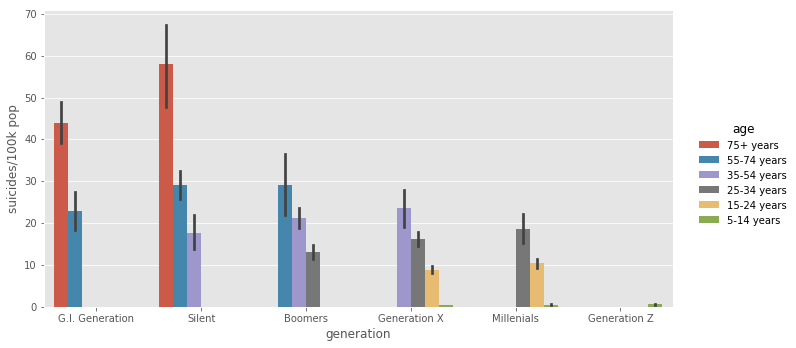

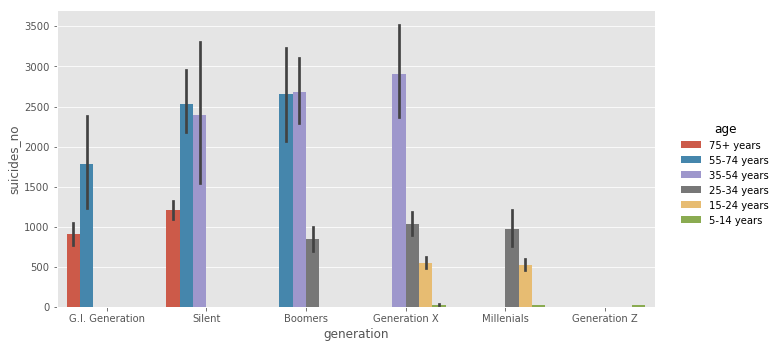

In [33]:
# x=age가 아닌 generation으로 둬서 봐보자.
g3 = sns.catplot(kind='bar', data=df, x='generation', y='suicides/100k pop', hue='age', 
                legend=True)
g3.fig.set_size_inches(12,6)
g3.fig.subplots_adjust(top=0.81, right=0.86)
plt.show()

g4 = sns.catplot(kind='bar', data=df, x='generation', y='suicides_no', hue='age', 
                legend=True)
g4.fig.set_size_inches(12,6)
g4.fig.subplots_adjust(top=0.81, right=0.86)
plt.show()

***x=generation보단 x=age로 보는게 훨씬 더 보기 쉬운 것 같다.***

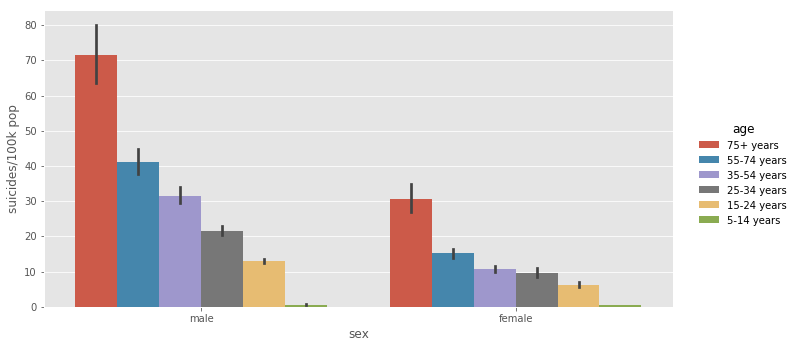

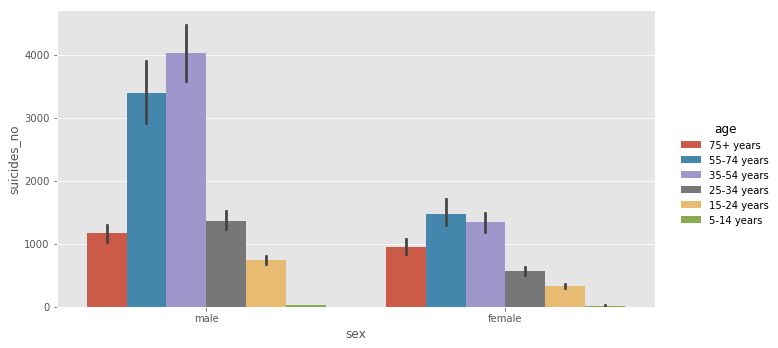

In [34]:
# x=sex로 찢어서 봐보자.
g4 = sns.catplot(kind='bar', data=df, x='sex', y='suicides/100k pop', hue='age', 
                legend=True)
g4.fig.set_size_inches(12,6)
g4.fig.subplots_adjust(top=0.81, right=0.86)
plt.show()

g5 = sns.catplot(kind='bar', data=df, x='sex', y='suicides_no', hue='age', 
                legend=True)
g5.fig.set_size_inches(12,6)
g5.fig.subplots_adjust(top=0.81, right=0.86)
plt.show()

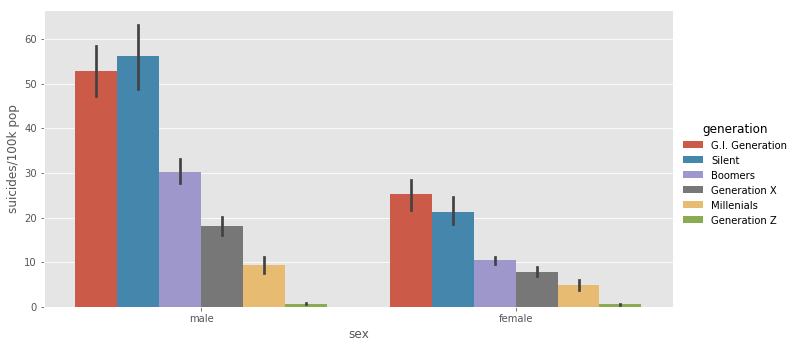

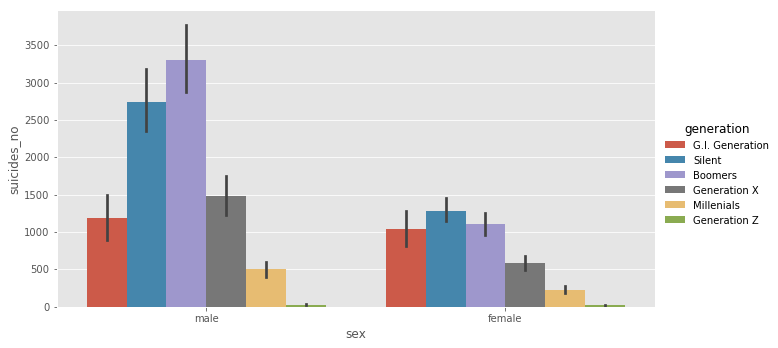

In [35]:
g6 = sns.catplot(kind='bar', data=df, x='sex', y='suicides/100k pop', hue='generation', legend=True)
g6.fig.set_size_inches(12,6)
g6.fig.subplots_adjust(top=0.81, right=0.86)
plt.show()

g7 = sns.catplot(kind='bar', data=df, x='sex', y='suicides_no', hue='generation', legend=True)
g7.fig.set_size_inches(12,6)
g7.fig.subplots_adjust(top=0.81, right=0.86)
plt.show()

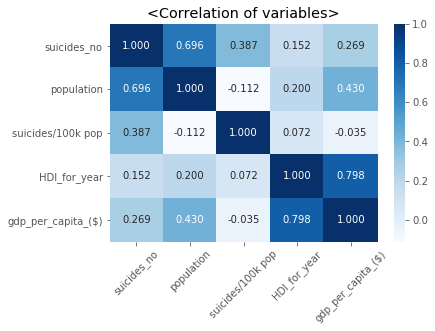

In [36]:
fig2 = sns.heatmap(data = df[corrList].corr(), annot = True, fmt='.3f', cmap='Blues')
fig2.set_xticklabels(fig2.get_xticklabels(), rotation=45)
plt.title('<Correlation of variables>')
plt.show()

    suicides/100k pop  vs.  suicides_no 뭘 타겟으로 잡나.
    
    suicides/100k pop을 컬럼에서 지우자.

In [37]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI_for_year,gdp_for_year_($),gdp_per_capita_($),generation
0,Germany,1990,male,75+ years,1516,1717700,88.26,0.801,"1,764,967,948,917",23546,G.I. Generation
1,Germany,1990,male,55-74 years,2406,6593100,36.49,0.801,"1,764,967,948,917",23546,G.I. Generation
2,Germany,1990,male,35-54 years,3302,11127100,29.68,0.801,"1,764,967,948,917",23546,Silent
3,Germany,1990,female,75+ years,1174,3978800,29.51,0.801,"1,764,967,948,917",23546,G.I. Generation
4,Germany,1990,male,25-34 years,1488,6721200,22.14,0.801,"1,764,967,948,917",23546,Boomers


In [6]:
# 컬럼지우기
df.drop(['suicides/100k pop'], axis=1, inplace=True) # ㅋㅋ 한번 더 실행해서 KeyError나오는거라고...
df.head()

,country,year,sex,age,suicides_no,population,HDI_for_year,gdp_for_year_($),gdp_per_capita_($),generation
0,Germany,1990,male,75+ years,1516,1717700,0.801,"1,764,967,948,917",23546,G.I. Generation
1,Germany,1990,male,55-74 years,2406,6593100,0.801,"1,764,967,948,917",23546,G.I. Generation
2,Germany,1990,male,35-54 years,3302,11127100,0.801,"1,764,967,948,917",23546,Silent
3,Germany,1990,female,75+ years,1174,3978800,0.801,"1,764,967,948,917",23546,G.I. Generation
4,Germany,1990,male,25-34 years,1488,6721200,0.801,"1,764,967,948,917",23546,Boomers


In [11]:
print(df.columns)

# csv로 저장한다음 회귀분석을 새로 해보자.
df.to_csv('./fixed_suicide_4(variable del).csv', sep=',')

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'HDI_for_year', 'gdp_for_year_($)', 'gdp_per_capita_($)', 'generation'],
      dtype='object')


### bar 위에 수치를 표현할 수 없을까

https://stackoverflow.com/questions/55586912/seaborn-catplot-set-values-over-the-bars
https://stackoverflow.com/questions/53029604/how-to-add-bar-value-on-the-top-catplot-seaborn

for 문 돌려서 바 마다 찍어줘야 되는듯.

In [38]:
import statsmodels.api as sm

In [39]:
df['suicides_no']

0       1516
1       2406
2       3302
3       1174
4       1488
        ... 
1051    1372
1052     421
1053     256
1054      17
1055      14
Name: suicides_no, Length: 1056, dtype: int64

In [41]:
df[['suicides_no']]

,suicides_no
0,1516
1,2406
2,3302
3,1174
4,1488
...,...
1051,1372
1052,421
1053,256
1054,17


In [42]:
target = df[['suicides_no']]
x = df[['population']]

In [43]:
model = sm.OLS(target, x)
result = model.fit()

In [44]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            suicides_no   R-squared (uncentered):                   0.675
Model:                            OLS   Adj. R-squared (uncentered):              0.675
Method:                 Least Squares   F-statistic:                              2191.
Date:                Tue, 06 Jul 2021   Prob (F-statistic):                   9.76e-260
Time:                        17:21:23   Log-Likelihood:                         -8959.9
No. Observations:                1056   AIC:                                  1.792e+04
Df Residuals:                    1055   BIC:                                  1.793e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
population     0.0002   4.51e-06     46.810      0.000       0.000       0.000
==============================================================================
Omnibus:                      422.213   Durbin-Watson:                   0.856
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1760.330
Skew:                           1.884   Prob(JB):                         0.00
Kurtosis:                       8.080   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""